# Data Exploration for Architectural Style Classification

In [4]:
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random
from tqdm import tqdm
from collections import Counter
#import cv2

In [5]:
plt.style.use('seaborn-v0_8-whitegrid')

## Working to see how many images we have

In [13]:
DUMITRUX_PATH = "../data/raw/dumitrux-dataset"
INTERNATIONAL_PATH = "../data/raw/jungseolin-dataset"
TARGET_PATH = "../data/processed"

os.makedirs(TARGET_PATH, exist_ok=True)

In [14]:
# Function to count images in a directory
def count_images_in_dir(directory):
    if not os.path.exists(directory):
        return 0
    
    img_extensions = ['.jpg', '.jpeg', '.png']
    count = 0
    
    for file in os.listdir(directory):
        if any(file.lower().endswith(ext) for ext in img_extensions):
            count += 1
    
    return count

def get_image_dimensions(img_path):
    try:
        img = Image.open(img_path)
        return img.size  # (width, height)
    except Exception as e:
        print(f"Error processing {img_path}: {e}")
        return None



### Step 1: Explore the Dumitrux dataset

In [ ]:
print("Exploring Dumitrux dataset...")

# Get all subdirectories in the Dumitrux dataset
dumitrux_dirs = []
dumitrux_style_counts = {}

# Check the main directories in the dataset
for main_dir in os.listdir(DUMITRUX_PATH):
    main_dir_path = os.path.join(DUMITRUX_PATH, main_dir)
    
    if os.path.isdir(main_dir_path):
        # If it's a directory containing architectural styles
        if main_dir in ['architectural-styles-dataset', 'g-images-dataset']:
            sub_dirs = os.listdir(main_dir_path)
            for style_dir in sub_dirs:
                style_dir_path = os.path.join(main_dir_path, style_dir)
                if os.path.isdir(style_dir_path):
                    style_name = style_dir
                    if style_name not in dumitrux_style_counts:
                        dumitrux_style_counts[style_name] = 0
                    
                    # Count images in this style directory
                    img_count = count_images_in_dir(style_dir_path)
                    dumitrux_style_counts[style_name] += img_count
                    dumitrux_dirs.append((style_dir_path, style_name))

# Print Dumitrux dataset stats
print(f"Found {len(dumitrux_style_counts)} architectural styles in Dumitrux dataset")
print(f"Total images: {sum(dumitrux_style_counts.values())}")



Exploring Dumitrux dataset...
../data/raw/dumitrux-dataset/g-images-dataset
../data/raw/dumitrux-dataset/README.txt
../data/raw/dumitrux-dataset/architectural-styles-dataset
Found 25 architectural styles in Dumitrux dataset
Total images: 15432


In [ ]:
# Plot distribution of images per style
plt.figure(figsize=(15, 8))
styles = list(dumitrux_style_counts.keys())
counts = list(dumitrux_style_counts.values())

# Sort by count
sorted_indices = np.argsort(counts)[::-1]  # descending order
sorted_styles = [styles[i] for i in sorted_indices]
sorted_counts = [counts[i] for i in sorted_indices]

sns.barplot(x=sorted_styles, y=sorted_counts)
plt.xticks(rotation=90)
plt.xlabel('Architectural Style')
plt.ylabel('Number of Images')
plt.title('Images per Architectural Style in Dumitrux Dataset')
plt.tight_layout()
plt.show()

### Step 2: Explore the International dataset

In [23]:
print("\nExploring International dataset...")

international_style_counts = {}

# Check if the path exists
if os.path.exists(INTERNATIONAL_PATH):
    # Based on your screenshot, the jungseolin dataset has style folders directly in the root
    for style_dir in os.listdir(INTERNATIONAL_PATH):
        style_dir_path = os.path.join(INTERNATIONAL_PATH, style_dir)
        
        if os.path.isdir(style_dir_path):
            style_name = style_dir
            
            # Check if this is a style directory or has a data subdirectory
            data_subdir = os.path.join(style_dir_path, "data")
            if os.path.exists(data_subdir) and os.path.isdir(data_subdir):
                # If there's a data subdirectory, count images there
                img_count = count_images_in_dir(data_subdir)
            else:
                # Otherwise look for images directly in this directory
                img_count = count_images_in_dir(style_dir_path)
            
            if style_name not in international_style_counts:
                international_style_counts[style_name] = 0
            international_style_counts[style_name] += img_count

# Print International dataset stats  
print(f"Found {len(international_style_counts)} architectural styles in International dataset")
print(f"Total images: {sum(international_style_counts.values())}")


Exploring International dataset...
Found 45 architectural styles in International dataset
Total images: 14823


In [ ]:
# Plot distribution of images per style
plt.figure(figsize=(15, 8))
styles = list(international_style_counts.keys())
counts = list(international_style_counts.values())

# Sort by count
sorted_indices = np.argsort(counts)[::-1]  # descending order
sorted_styles = [styles[i] for i in sorted_indices]
sorted_counts = [counts[i] for i in sorted_indices]

sns.barplot(x=sorted_styles, y=sorted_counts)
plt.xticks(rotation=90)
plt.xlabel('Architectural Style')
plt.ylabel('Number of Images')
plt.title('Images per Architectural Style in International Dataset')
plt.tight_layout()
plt.show()

### Step 3: Compare the datasets

In [27]:
print("\nComparing datasets...")
# Find styles unique to each dataset
dumitrux_styles = set(dumitrux_style_counts.keys())
international_styles = set(international_style_counts.keys())

styles_in_both = dumitrux_styles.intersection(international_styles)
only_in_dumitrux = dumitrux_styles - international_styles
only_in_international = international_styles - dumitrux_styles

print(f"Styles in both datasets: {len(styles_in_both)}")
print(f"Styles only in Dumitrux: {len(only_in_dumitrux)}")
print(f"Styles only in International: {len(only_in_international)}")

# Print styles unique to each dataset
print("\nStyles only in Dumitrux:")
for style in sorted(only_in_dumitrux):
    print(f"- {style} ({dumitrux_style_counts[style]} images)")

print("\nStyles only in International:")
for style in sorted(only_in_international):
    print(f"- {style} ({international_style_counts[style]} images)")


Comparing datasets...
Styles in both datasets: 25
Styles only in Dumitrux: 0
Styles only in International: 20

Styles only in Dumitrux:

Styles only in International:
- Amazigh architecture (155 images)
- Architecture of Edo Period (303 images)
- Architecture of the Joseon Dynasty (255 images)
- Architecture of the Qing Dynasty (293 images)
- Balinese architecture (172 images)
- Brutalist architecture (256 images)
- Buddhist architecture (220 images)
- Dravidian architecture (241 images)
- Hausa architecture (217 images)
- Jain architecture (107 images)
- Khmer architecture (259 images)
- Maya architecture (337 images)
- Minangkabau architecture (315 images)
- Moorish architecture (218 images)
- Mughal architecture (262 images)
- Ottoman architecture (324 images)
- Pueblo architecture (68 images)
- Safavid architecture (344 images)
- Stalinist architecture (212 images)
- Swahili architecture (152 images)


### Step 4: Explore image dimensions to plan preprocessing

In [28]:
print("\nExploring image dimensions...")

# Sample some images to get dimension statistics
sample_size = 500  # Sample up to 500 images
widths = []
heights = []
aspect_ratios = []

# Function to collect dimension samples from a directory
def collect_dimension_samples(directory, limit):
    samples = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                samples.append(os.path.join(root, file))
                if len(samples) >= limit:
                    break
        if len(samples) >= limit:
            break
    return samples


Exploring image dimensions...


Analyzing image dimensions: 100%|██████████| 500/500 [00:00<00:00, 16301.09it/s]


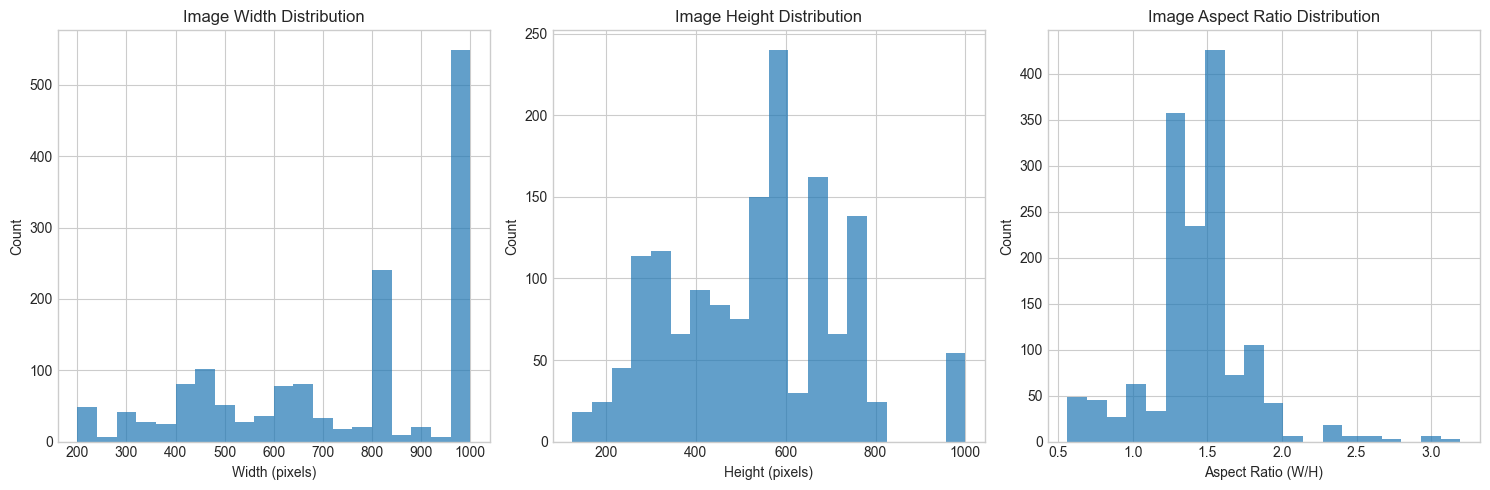


Image dimension statistics:
Width - Mean: 739.4px, Median: 800.0px, Min: 200px, Max: 1000px
Height - Mean: 530.3px, Median: 539.5px, Min: 125px, Max: 1000px
Aspect Ratio - Mean: 1.43, Median: 1.45


In [31]:
# Collect samples from both datasets
dumitrux_samples = collect_dimension_samples(DUMITRUX_PATH, sample_size//2)
international_samples = collect_dimension_samples(INTERNATIONAL_PATH, sample_size//2)

all_samples = dumitrux_samples + international_samples
random.shuffle(all_samples)
all_samples = all_samples[:sample_size]  # Limit to sample size

for img_path in tqdm(all_samples, desc="Analyzing image dimensions"):
    dims = get_image_dimensions(img_path)
    if dims:
        width, height = dims
        widths.append(width)
        heights.append(height)
        aspect_ratios.append(width / height)

# Plot dimension distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(widths, bins=20, alpha=0.7)
plt.xlabel('Width (pixels)')
plt.ylabel('Count')
plt.title('Image Width Distribution')

plt.subplot(1, 3, 2)
plt.hist(heights, bins=20, alpha=0.7)
plt.xlabel('Height (pixels)')
plt.ylabel('Count')
plt.title('Image Height Distribution')

plt.subplot(1, 3, 3)
plt.hist(aspect_ratios, bins=20, alpha=0.7)
plt.xlabel('Aspect Ratio (W/H)')
plt.ylabel('Count')
plt.title('Image Aspect Ratio Distribution')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nImage dimension statistics:")
print(f"Width - Mean: {np.mean(widths):.1f}px, Median: {np.median(widths):.1f}px, Min: {np.min(widths)}px, Max: {np.max(widths)}px")
print(f"Height - Mean: {np.mean(heights):.1f}px, Median: {np.median(heights):.1f}px, Min: {np.min(heights)}px, Max: {np.max(heights)}px")
print(f"Aspect Ratio - Mean: {np.mean(aspect_ratios):.2f}, Median: {np.median(aspect_ratios):.2f}")


### Step 5: Create combined dataset plan

In [33]:
print("\nCreating combined dataset plan...")

# Create a plan for the combined dataset
combined_styles = {}

# Start with all styles from Dumitrux
for style, count in dumitrux_style_counts.items():
    combined_styles[style] = {
        'total': count,
        'from_dumitrux': count,
        'from_international': 0
    }

# Add unique styles from International
for style, count in international_style_counts.items():
    if style in combined_styles:
        # Style already exists from Dumitrux, skip (as per instructions)
        continue
    else:
        # New style, add it
        combined_styles[style] = {
            'total': count,
            'from_dumitrux': 0,
            'from_international': count
        }
        
# Create DataFrame for better visualization
combined_df = pd.DataFrame([
    {
        'Style': style,
        'Total Images': data['total'],
        'From Dumitrux': data['from_dumitrux'],
        'From International': data['from_international'],
        'Source': 'Both' if data['from_dumitrux'] > 0 and data['from_international'] > 0 else
                 'Dumitrux' if data['from_dumitrux'] > 0 else 'International'
    }
    for style, data in combined_styles.items()
])


Creating combined dataset plan...


Combined dataset will have 45 architectural styles
Total images: 20142

Top 20 architectural styles by number of images:
                               Style  Total Images    Source
12           Queen Anne architecture          1015  Dumitrux
9              Colonial architecture           783  Dumitrux
15          Art Nouveau architecture           780  Dumitrux
22             Art Deco architecture           766  Dumitrux
7         Tudor Revival architecture           748  Dumitrux
11        Greek Revival architecture           719  Dumitrux
21           Achaemenid architecture           715  Dumitrux
13              Baroque architecture           673  Dumitrux
23  American Foursquare architecture           665  Dumitrux
4            Beaux-Arts architecture           657  Dumitrux
2                International style           627  Dumitrux
18             Georgian architecture           608  Dumitrux
0             Palladian architecture           573  Dumitrux
5      Ancient Egyptian a

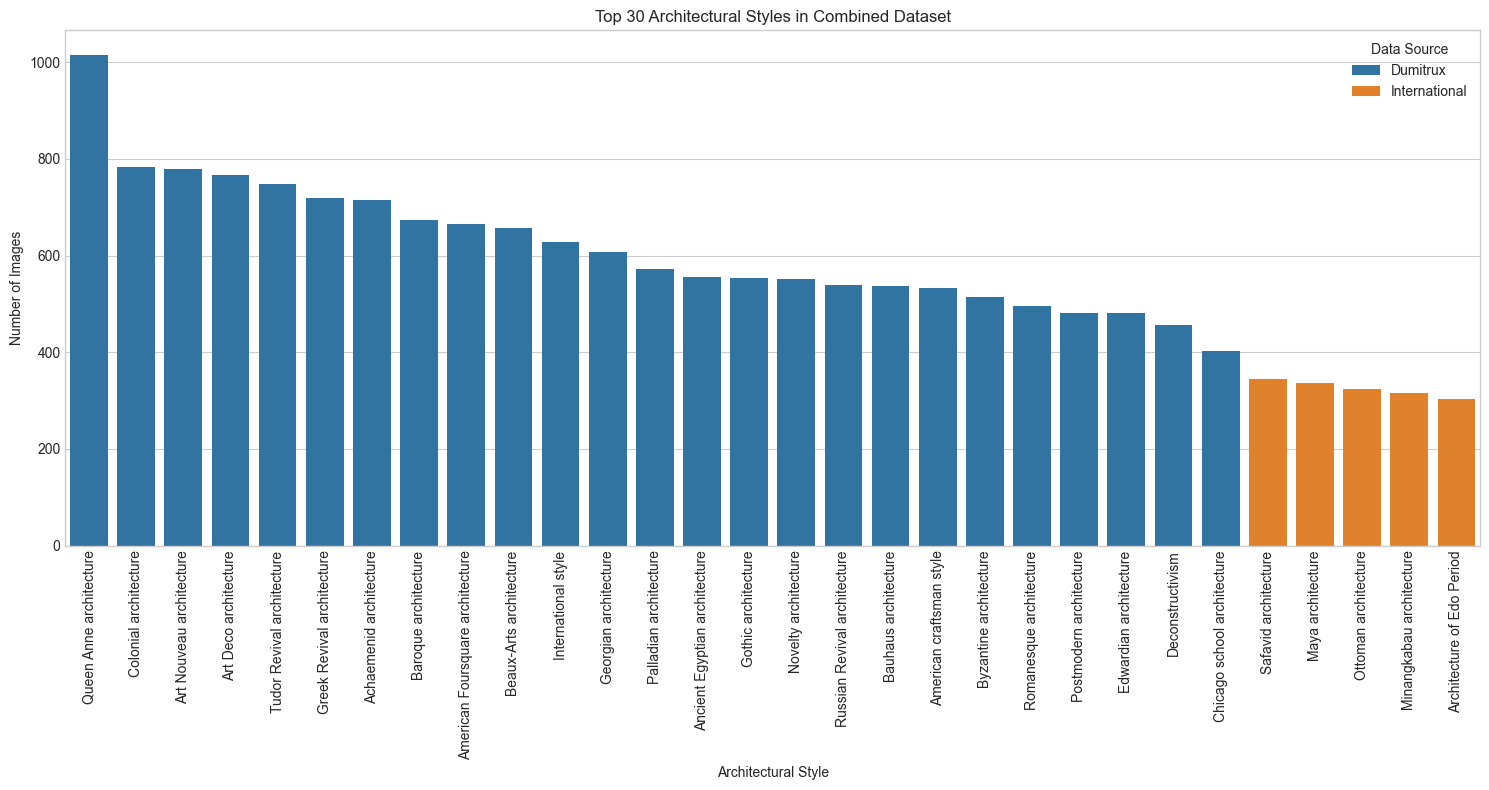

In [34]:
# Sort by total images descending
combined_df = combined_df.sort_values('Total Images', ascending=False)

print(f"Combined dataset will have {len(combined_df)} architectural styles")
print(f"Total images: {combined_df['Total Images'].sum()}")

# Show the top 20 classes by number of images
print("\nTop 20 architectural styles by number of images:")
print(combined_df.head(20)[['Style', 'Total Images', 'Source']])

# Plot the combined dataset distribution
plt.figure(figsize=(15, 8))
sns.barplot(x='Style', y='Total Images', hue='Source', data=combined_df.head(30))
plt.xticks(rotation=90)
plt.xlabel('Architectural Style')
plt.ylabel('Number of Images')
plt.title('Top 30 Architectural Styles in Combined Dataset')
plt.legend(title='Data Source')
plt.tight_layout()
plt.show()

### Step 6: Check for class imbalance in the combined dataset


Analyzing class imbalance...


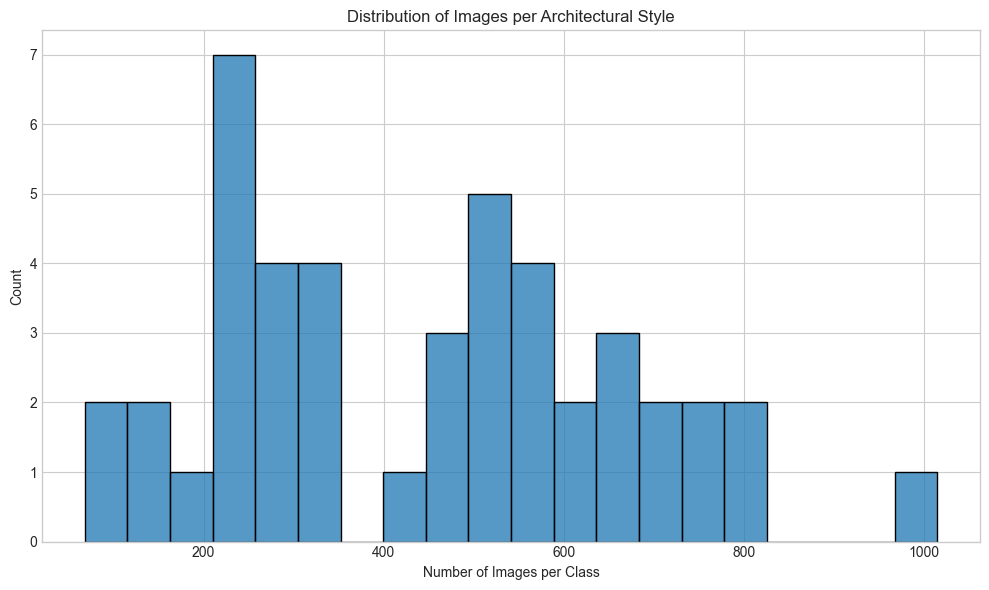

Minimum images in a class: 68
Maximum images in a class: 1015
Median images per class: 481.0
Imbalance ratio (max/min): 14.9


In [36]:
print("\nAnalyzing class imbalance...")

plt.figure(figsize=(10, 6))
sns.histplot(combined_df['Total Images'], bins=20)
plt.xlabel('Number of Images per Class')
plt.ylabel('Count')
plt.title('Distribution of Images per Architectural Style')
plt.tight_layout()
plt.show()

# Calculate imbalance metrics
min_images = combined_df['Total Images'].min()
max_images = combined_df['Total Images'].max()
median_images = combined_df['Total Images'].median()
imbalance_ratio = max_images / min_images

print(f"Minimum images in a class: {min_images}")
print(f"Maximum images in a class: {max_images}")
print(f"Median images per class: {median_images}")
print(f"Imbalance ratio (max/min): {imbalance_ratio:.1f}")

### Step 7: Combine Datasets

In [ ]:
# Function to actually create the combined dataset
def create_combined_dataset():
    print("\nCreating combined dataset...")
    
    # Step 1: Create all necessary target directories
    for style in tqdm(combined_styles.keys(), desc="Creating directories"):
        style_dir = os.path.join(TARGET_PATH, style)
        os.makedirs(style_dir, exist_ok=True)
    
    # Function to generate a safe filename
    def create_safe_filename(orig_path, source_dir):
        import hashlib
        base, ext = os.path.splitext(os.path.basename(orig_path))
        
        # Create a short hash of the original filename to preserve uniqueness
        name_hash = hashlib.md5(base.encode()).hexdigest()[:8]
        
        # Limit base filename to 50 characters
        if len(base) > 50:
            base = base[:50]
            
        # Create a new filename that's much shorter but still unique
        new_filename = f"{source_dir}_{base[:50]}_{name_hash}{ext}"
        
        return new_filename
    
    # Step 2: Copy all images from Dumitrux dataset
    for dir_path, style_name in tqdm(dumitrux_dirs, desc="Processing Dumitrux dataset"):
        target_dir = os.path.join(TARGET_PATH, style_name)
        
        # Copy all images from this directory
        for file in os.listdir(dir_path):
            file_path = os.path.join(dir_path, file)
            if os.path.isfile(file_path) and file.lower().endswith(('.jpg', '.jpeg', '.png')):
                # Generate a unique filename to avoid collisions
                base, ext = os.path.splitext(file)
                source_dir = os.path.basename(os.path.dirname(dir_path))
                new_filename = f"{source_dir}_{base}{ext}"
                
                target_path = os.path.join(target_dir, new_filename)
                shutil.copy2(file_path, target_path)
    
    # Step 3: Add unique styles from International dataset
    # Only add styles that don't exist in Dumitrux dataset
    
    for style_dir in tqdm(os.listdir(INTERNATIONAL_PATH), desc="Processing International dataset"):
        style_dir_path = os.path.join(INTERNATIONAL_PATH, style_dir)
        
        if not os.path.isdir(style_dir_path):
            continue
            
        if style_dir not in dumitrux_style_counts:
            target_dir = os.path.join(TARGET_PATH, style_dir)
            
            # Check if there's a data subdirectory
            data_subdir = os.path.join(style_dir_path, "data")
            if os.path.exists(data_subdir) and os.path.isdir(data_subdir):
                source_dir = data_subdir
            else:
                source_dir = style_dir_path
            
            # Copy all images from this directory
            for file in os.listdir(source_dir):
                file_path = os.path.join(source_dir, file)
                if os.path.isfile(file_path) and file.lower().endswith(('.jpg', '.jpeg', '.png')):
                    target_path = os.path.join(target_dir, file)
                    shutil.copy2(file_path, target_path)
    
    # Step 4: Verify the dataset
    actual_styles = [d for d in os.listdir(TARGET_PATH) if os.path.isdir(os.path.join(TARGET_PATH, d))]
    actual_counts = {style: count_images_in_dir(os.path.join(TARGET_PATH, style)) for style in actual_styles}
    
    print(f"\nCombined dataset created with {len(actual_styles)} styles")
    print(f"Total images: {sum(actual_counts.values())}")
    
    # Check if any expected styles are missing
    missing_styles = set(combined_styles.keys()) - set(actual_styles)
    if missing_styles:
        print(f"Warning: {len(missing_styles)} expected styles are missing:")
        for style in missing_styles:
            print(f"- {style}")

In [38]:
create_combined_dataset()


Creating combined dataset...


Processing Dumitrux dataset:  98%|█████████▊| 49/50 [00:06<00:00,  8.08it/s]


OSError: [Errno 63] File name too long: '../data/processed/Russian Revival architecture/architectural-styles-dataset_1337_800px-%D0%90%D0%BB%D0%B5%D0%BA%D1%81%D0%B0%D0%BD%D0%B4%D1%80%D0%BE%D0%B2._%D0%A6%D0%B5%D1%80%D0%BA%D0%BE%D0%B2%D1%8C_%D0%A1%D0%B5%D1%80%D0%B0%D1%84%D0%B8%D0%BC%D0%B0_%D0%A1%D0%B0%D1%80%D0%BE%D0%B2%D1%81%D0%BA%D0%BE%D0%B3%D0%BE..jpg'

In [40]:
# Next Steps

# Final recommendations
print("\nRecommendations for preprocessing:")
print("1. Resize images to 224×224 (standard for many CNNs)")
print("2. Normalize using ImageNet mean and std: ([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])")
print("3. Use data augmentation to address class imbalance")
print("4. Create stratified train/validation/test splits (70/15/15)")
print("5. Consider limiting the maximum number of images per class to reduce extreme imbalance")


Recommendations for preprocessing:
1. Resize images to 224×224 (standard for many CNNs)
2. Normalize using ImageNet mean and std: ([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
3. Use data augmentation to address class imbalance
4. Create stratified train/validation/test splits (70/15/15)
5. Consider limiting the maximum number of images per class to reduce extreme imbalance
